In [1]:
from google.colab import files
uploaded = files.upload()


Saving IBM_Support_Tickets_Analysis.csv to IBM_Support_Tickets_Analysis.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: For better plot styling
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)


In [3]:
# Replace the filename with your actual uploaded file name if different
df = pd.read_csv("IBM_Support_Tickets_Analysis.csv")

# Show the first 5 rows
df.head()


,Ticket ID,Date Created,Issue Type,Severity,Assigned To,Resolution Time (hrs),Status,Customer Satisfaction (1-5)
0,TKT0001,2023-01-09,Network Error,Low,Agent B,15.4,Closed,5.0
1,TKT0002,2023-07-12,Login Issue,Medium,Agent A,7.3,Closed,4.0
2,TKT0003,2023-10-14,Software Bug,High,Agent C,49.7,In Progress,NaN
3,TKT0004,2023-05-17,Software Bug,Critical,Agent A,39.4,In Progress,NaN
4,TKT0005,2023-08-03,Software Bug,Low,Agent C,60.6,In Progress,NaN


In [4]:
# Overview of columns, datatypes, and missing values
df.info()

# Basic statistics
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Ticket ID                    200 non-null    object 
 1   Date Created                 200 non-null    object 
 2   Issue Type                   200 non-null    object 
 3   Severity                     200 non-null    object 
 4   Assigned To                  200 non-null    object 
 5   Resolution Time (hrs)        182 non-null    float64
 6   Status                       200 non-null    object 
 7   Customer Satisfaction (1-5)  76 non-null     float64
dtypes: float64(2), object(6)
memory usage: 12.6+ KB


,Ticket ID,Date Created,Issue Type,Severity,Assigned To,Resolution Time (hrs),Status,Customer Satisfaction (1-5)
count,200,200,200,200,200,182.000000,200,76.000000
unique,200,155,5,4,4,NaN,4,NaN
top,TKT0001,2023-08-21,Access Request,Medium,Agent C,NaN,Open,NaN
freq,1,4,47,61,55,NaN,66,NaN
mean,NaN,NaN,NaN,NaN,NaN,36.595604,NaN,3.263158
std,NaN,NaN,NaN,NaN,NaN,19.856657,NaN,1.517616
min,NaN,NaN,NaN,NaN,NaN,2.400000,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,20.750000,NaN,2.000000
50%,NaN,NaN,NaN,NaN,NaN,35.000000,NaN,3.500000
75%,NaN,NaN,NaN,NaN,NaN,52.625000,NaN,5.000000


In [5]:
# Convert 'Date Created' to datetime format
df['Date Created'] = pd.to_datetime(df['Date Created'])


In [6]:
df.isnull().sum()


,0
Ticket ID,0
Date Created,0
Issue Type,0
Severity,0
Assigned To,0
Resolution Time (hrs),18
Status,0
Customer Satisfaction (1-5),124


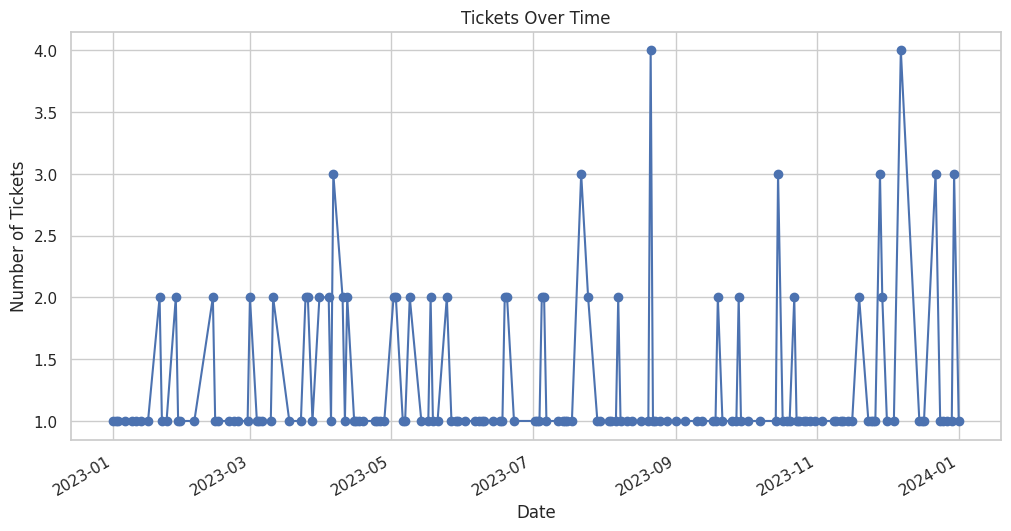

In [7]:
tickets_per_day = df['Date Created'].value_counts().sort_index()
tickets_per_day.plot(kind='line', title='Tickets Over Time', marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Tickets')
plt.grid(True)
plt.show()


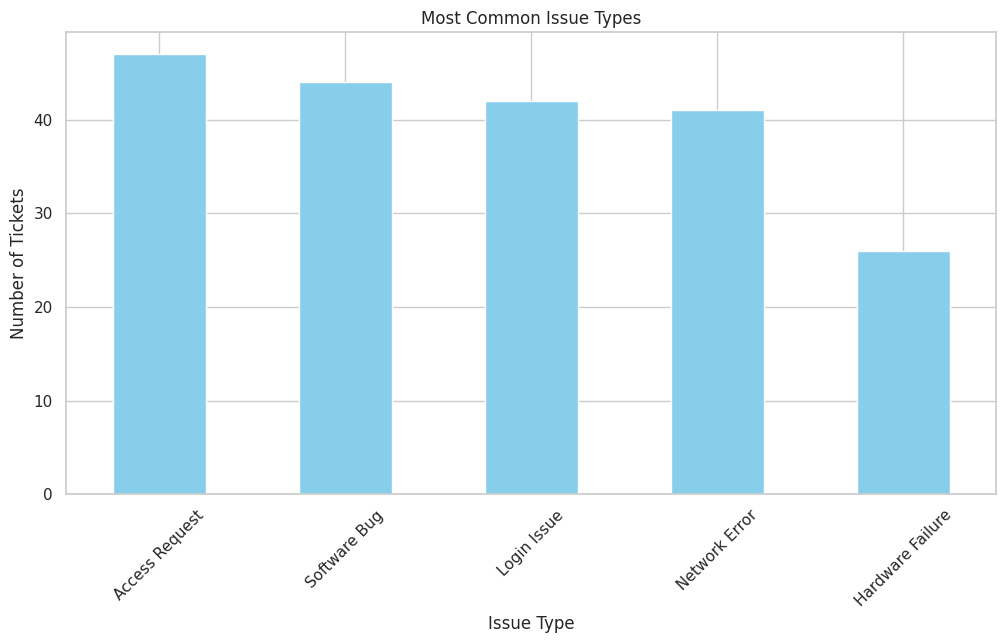

In [8]:
df['Issue Type'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Most Common Issue Types')
plt.xlabel('Issue Type')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=45)
plt.show()


<ipython-input-9-3557447928>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Severity', y='Resolution Time (hrs)', data=df, palette='Set2')


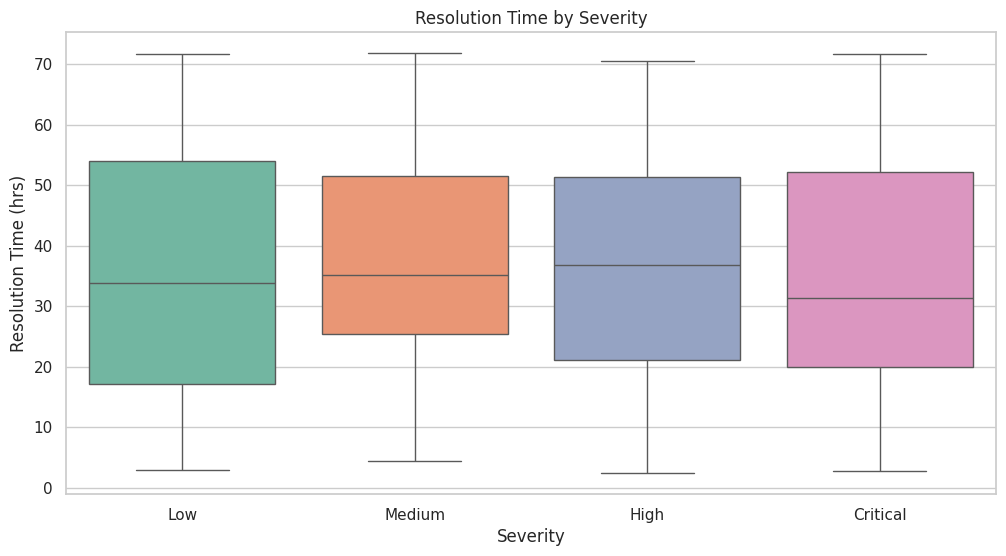

In [9]:
sns.boxplot(x='Severity', y='Resolution Time (hrs)', data=df, palette='Set2')
plt.title('Resolution Time by Severity')
plt.xlabel('Severity')
plt.ylabel('Resolution Time (hrs)')
plt.show()


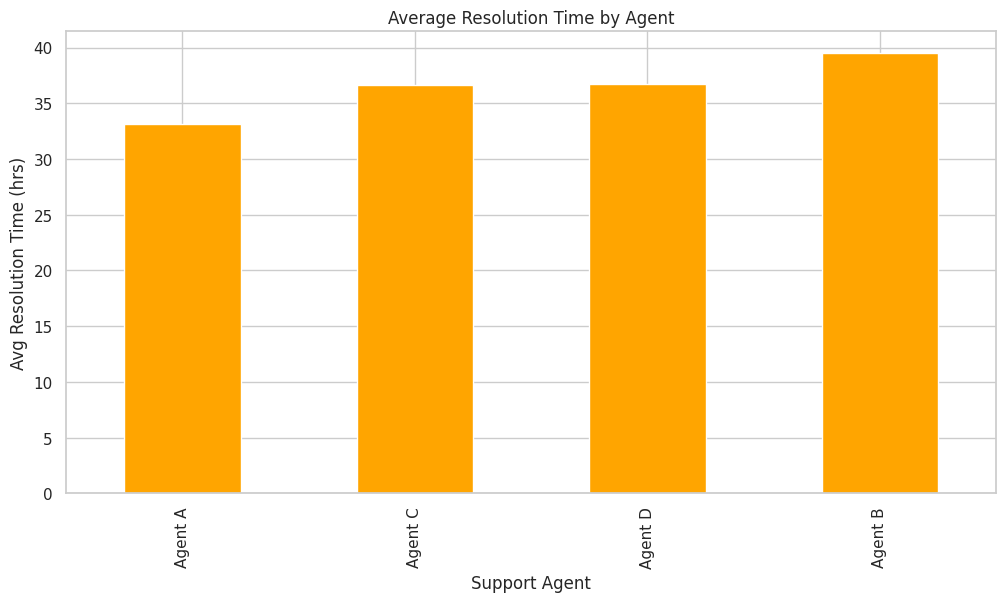

In [10]:
avg_resolution = df.groupby('Assigned To')['Resolution Time (hrs)'].mean().sort_values()
avg_resolution.plot(kind='bar', color='orange')
plt.title('Average Resolution Time by Agent')
plt.xlabel('Support Agent')
plt.ylabel('Avg Resolution Time (hrs)')
plt.show()
